In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

In [26]:
df = pd.read_csv("hf://datasets/misikoff/SPX/^SPX.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Retain the Date column and set it as the index
df['Date_Original'] = df['Date']
df.set_index('Date', inplace=True)
df = df.sort_index()

print("\nShape of dataset:", df.shape)
print("\nSummary Statistics:\n", df.describe())
print("\nDataset Info:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\n### Missing Values Per Column ###\n", missing_values[missing_values > 0])

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\n### Number of Duplicate Rows: {duplicate_count}")


Shape of dataset: (24167, 7)

Summary Statistics:
                Open          High           Low         Close     Adj Close  \
count  24167.000000  24167.000000  24167.000000  24167.000000  24167.000000   
mean     597.870701    621.402637    613.901200    617.896353    617.896353   
min        0.000000      4.400000      4.400000      4.400000      4.400000   
25%        9.650000     24.590000     24.590000     24.590000     24.590000   
50%       42.110001    102.650002    101.129997    101.949997    101.949997   
75%     1003.494995   1010.570007    994.065002   1003.494995   1003.494995   
max     5175.140137   5189.259766   5151.879883   5175.270020   5175.270020   
std     1004.579946    999.012180    987.551179    993.672669    993.672669   

             Volume                  Date_Original  
count  2.416700e+04                          24167  
mean   8.948744e+08  1976-03-09 19:45:41.374601728  
min    0.000000e+00            1927-12-30 00:00:00  
25%    1.500000e+06     

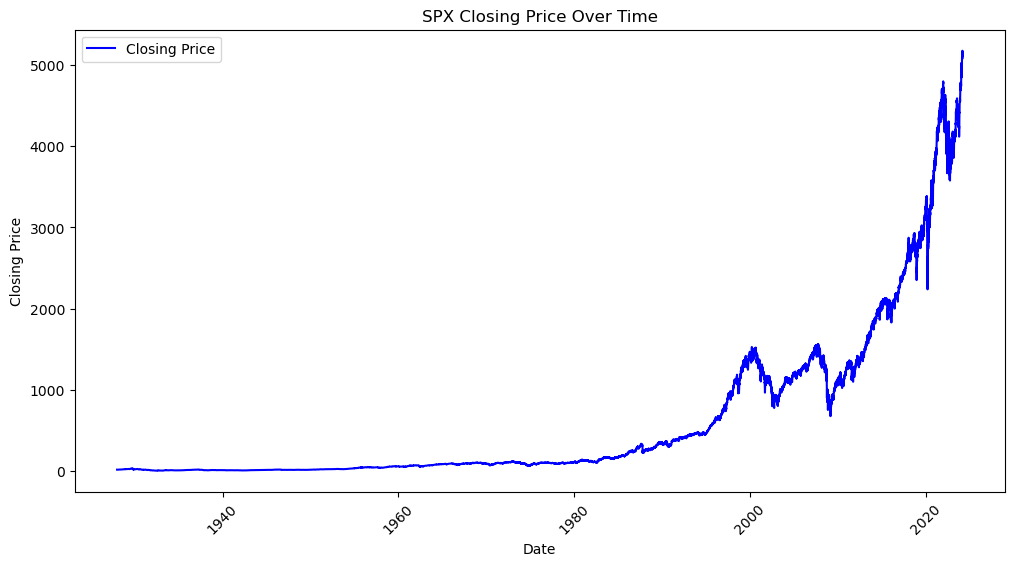

In [28]:
# Plot Closing Price over Time with Dates on X-Axis
plt.figure(figsize=(12,6))
plt.plot(df['Date_Original'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('SPX Closing Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

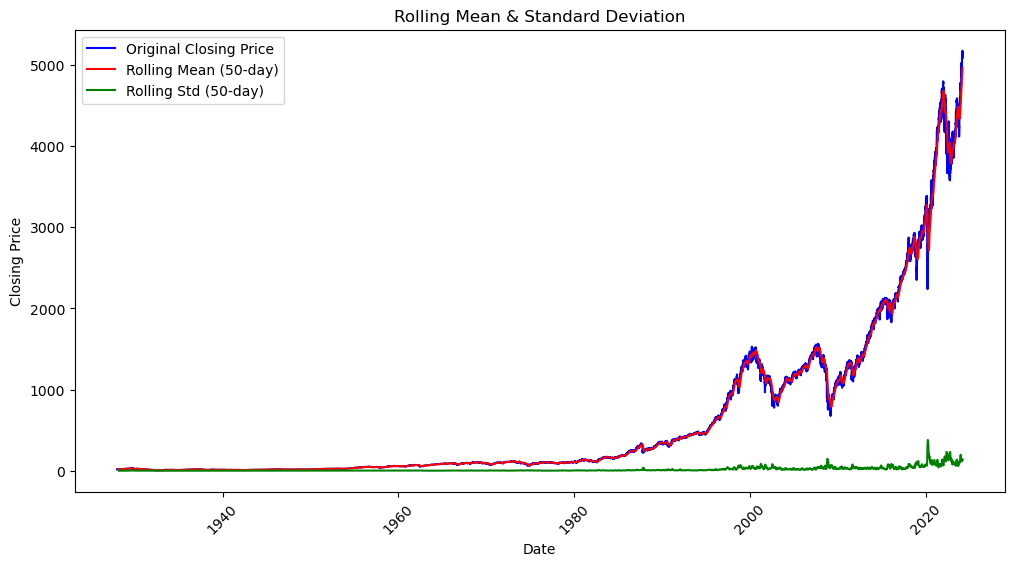

In [29]:
# Rolling Statistics for Trend Analysis
rolling_mean = df['Close'].rolling(window=50).mean()
rolling_std = df['Close'].rolling(window=50).std()

plt.figure(figsize=(12,6))
plt.plot(df['Date_Original'], df['Close'], label='Original Closing Price', color='blue')
plt.plot(df['Date_Original'], rolling_mean, label='Rolling Mean (50-day)', color='red')
plt.plot(df['Date_Original'], rolling_std, label='Rolling Std (50-day)', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.show()